In [1]:
from data import get_data
import numpy as np
import pandas as pd
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [16]:
def parkinson(data: pd.DataFrame):
        """
        Calculates the parkinson volatility estimator.
        :return:
        """
        const = 4 * np.log(2)

        rs = (np.log(data["high"] / data["low"]) ** 2.0).rolling(window=30).sum()

        result = (rs / (const * 252)) ** 0.5
        
        result = result*1000
        
        return result

In [3]:
aapl = get_data("AAPL", period="2y")

The size of  AAPL is  (501, 7)


In [4]:
aapl

,open,high,low,close,volume,dom,returns
datetime,,,,,,,
2022-06-07 04:00:00+00:00,142.735132,147.333105,142.487929,147.046356,67808200,7,0.017586
2022-06-08 04:00:00+00:00,146.917838,148.193400,145.810373,146.304779,53950200,8,-0.005043
2022-06-09 04:00:00+00:00,145.434597,146.294860,140.935496,141.044266,69473000,9,-0.035956
2022-06-10 04:00:00+00:00,138.710671,139.185297,135.526693,135.595917,91437900,10,-0.038629
2022-06-13 04:00:00+00:00,131.383563,133.687499,129.969568,130.404648,122207100,13,-0.038285
...,...,...,...,...,...,...,...
2024-05-29 04:00:00+00:00,189.610001,192.250000,189.509995,190.289993,53068000,29,0.001579
2024-05-30 04:00:00+00:00,190.759995,192.179993,190.630005,191.289993,49947900,30,0.005255
2024-05-31 04:00:00+00:00,191.440002,192.570007,189.910004,192.250000,75158300,31,0.005019


In [17]:
volatility = parkinson(aapl)

In [18]:
volatility.size

501

In [19]:
volatility = volatility.dropna()
volatility.size

472

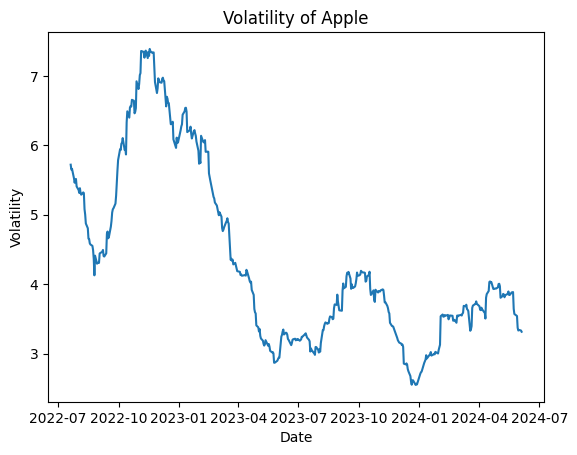

In [20]:
plt.plot(volatility)
plt.title("Volatility of Apple")
plt.xlabel("Date")
plt.ylabel('Volatility')
plt.show()

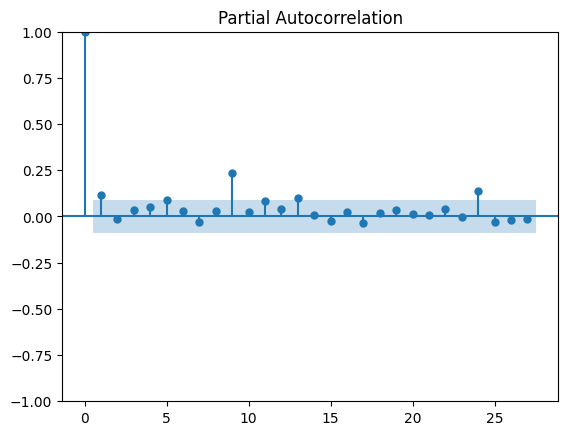

In [21]:
plot_pacf(aapl.returns**2)
plt.show()

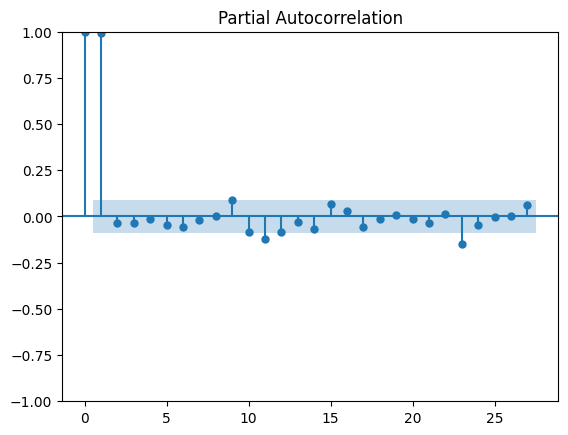

In [22]:
plot_pacf(volatility**2)
plt.show()

In [23]:
model = arch_model(volatility, p=2, q=2)

In [24]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 43255188634.42212
Iteration:      2,   Func. Count:     19,   Neg. LLF: 404142584.1046285
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4192.910479591698
Iteration:      4,   Func. Count:     35,   Neg. LLF: 14178.468273128809
Iteration:      5,   Func. Count:     43,   Neg. LLF: 456.21339814914336
Iteration:      6,   Func. Count:     50,   Neg. LLF: 453.6519051549394
Iteration:      7,   Func. Count:     59,   Neg. LLF: 438.5891933040056
Iteration:      8,   Func. Count:     66,   Neg. LLF: 442.67348497542486
Iteration:      9,   Func. Count:     74,   Neg. LLF: 438.2613708424745
Iteration:     10,   Func. Count:     81,   Neg. LLF: 438.18475714306265
Iteration:     11,   Func. Count:     88,   Neg. LLF: 438.1512780222706
Iteration:     12,   Func. Count:     95,   Neg. LLF: 438.13498072820255
Iteration:     13,   Func. Count:    102,   Neg. LLF: 438.13469269480584
Iteration:     14,   Func. Count:    109,   Neg. LLF: 438.

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -438.135
Distribution:                  Normal   AIC:                           888.269
Method:            Maximum Likelihood   BIC:                           913.211
                                        No. Observations:                  472
Date:                Wed, Jun 05 2024   Df Residuals:                      471
Time:                        10:20:30   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.8193  3.363e-02    113.584      0.000 [  3.753,  3.885]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.5020e-03  1.258e-02      0.278      0.781 [-2.115e-02,2.815e-02]
alpha[1]       0.9778      0.190      5.153  2.566e-07      [  0.606,  1.350]
alpha[2]   2.1508e-09      2.675  8.039e-10      1.000      [ -5.244,  5.244]
beta[1]        0.0000      2.270      0.000      1.000      [ -4.449,  4.449]
beta[2]        0.0222      0.198      0.112      0.911      [ -0.367,  0.411]
=============================================================================

Covariance estimator: robust
"""

In [26]:
model_new = arch_model(volatility, p=1, q=0)

In [27]:
model_fit = model_new.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 9432.347435136911
Iteration:      2,   Func. Count:     13,   Neg. LLF: 35635.29487205531
Iteration:      3,   Func. Count:     18,   Neg. LLF: 888.2545085691847
Iteration:      4,   Func. Count:     23,   Neg. LLF: 3701.991884337421
Iteration:      5,   Func. Count:     28,   Neg. LLF: 470.56909529185435
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1811.409249495865
Iteration:      7,   Func. Count:     40,   Neg. LLF: 913.9379585655659
Iteration:      8,   Func. Count:     46,   Neg. LLF: 479.62970914666596
Iteration:      9,   Func. Count:     52,   Neg. LLF: 459.07581715897925
Iteration:     10,   Func. Count:     56,   Neg. LLF: 451.7167481238518
Iteration:     11,   Func. Count:     60,   Neg. LLF: 1086.2133213894772
Iteration:     12,   Func. Count:     65,   Neg. LLF: 7509.514379995888
Iteration:     13,   Func. Count:     70,   Neg. LLF: 470.10700842138067
Iteration:     14,   Func. Count:     75,   Neg. LLF: 436.6

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -434.883
Distribution:                  Normal   AIC:                           875.766
Method:            Maximum Likelihood   BIC:                           888.237
                                        No. Observations:                  472
Date:                Wed, Jun 05 2024   Df Residuals:                      471
Time:                        10:21:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             3.5490  2.240e-02    158.424      0.000 [  3.505,  3.593]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.0502e-03  2.894e-03      1.745  8.102e-02 [-6.227e-04,1.072e-02]
alpha[1]       1.0000  3.396e-02     29.444 1.501e-190      [  0.933,  1.067]
=============================================================================

Covariance estimator: robust
"""